In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('palm_ffb.csv')
df

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [5]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


<AxesSubplot:>

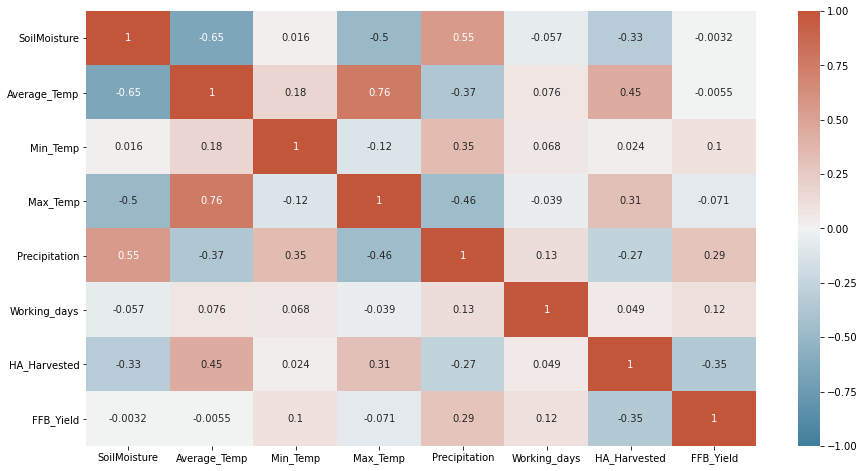

In [6]:
plt.figure(figsize=(15,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap=cmap)

In [7]:
X = df.iloc[:, 1:8]
y = df[['FFB_Yield']]

In [8]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
model = regression.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [2.73309135]
Coefficients: [[-1.10573931e-03  9.13275989e-02 -2.48853822e-02 -1.29366180e-02
   1.31580864e-03  1.39757385e-02 -3.30754402e-06]]


### Liniearity test

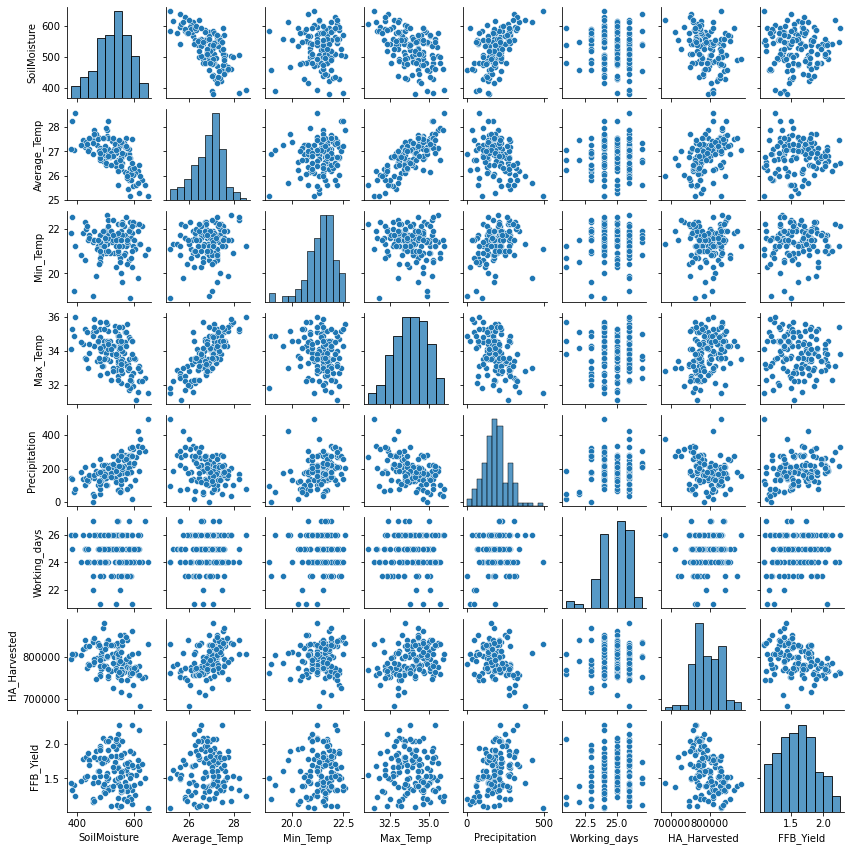

In [53]:
sns.pairplot(df, height=1.5)

### t-Test

In [56]:
import researchpy as rp
import scipy.stats as stats

#### Soil Moisture and FFB_Yield

In [80]:
rp.ttest(group1= df['SoilMoisture'], group1_name= "SoilMoisture",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(       Variable      N        Mean          SD         SE   95% Conf.  \
 0  SoilMoisture  130.0  527.646923   57.367844   5.031493  517.691991   
 1     FFB_Yield  130.0    1.602231    0.281751   0.024711    1.553339   
 2      combined  260.0  264.624577  266.621609  16.535170  232.064089   
 
      Interval  
 0  537.601855  
 1    1.651122  
 2  297.185065  ,
                          Independent t-test   results
 0  Difference (SoilMoisture - FFB_Yield) =   526.0447
 1                     Degrees of freedom =   258.0000
 2                                      t =   104.5492
 3                  Two side test p value =     0.0000
 4                 Difference < 0 p value =     1.0000
 5                 Difference > 0 p value =     0.0000
 6                              Cohen's d =    12.9677
 7                              Hedge's g =    12.9300
 8                          Glass's delta =     9.1697
 9                            Pearson's r =     0.9884)

#### Average_Temp and FFB_Yield

In [81]:
rp.ttest(group1= df['Average_Temp'], group1_name= "Average_Temp",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  Average_Temp  130.0  26.849918   0.651413  0.057133  26.736880  26.962957
 1     FFB_Yield  130.0   1.602231   0.281751  0.024711   1.553339   1.651122
 2      combined  260.0  14.226075  12.658105  0.785022  12.680236  15.771914,
                          Independent t-test   results
 0  Difference (Average_Temp - FFB_Yield) =    25.2477
 1                     Degrees of freedom =   258.0000
 2                                      t =   405.5997
 3                  Two side test p value =     0.0000
 4                 Difference < 0 p value =     1.0000
 5                 Difference > 0 p value =     0.0000
 6                              Cohen's d =    50.3084
 7                              Hedge's g =    50.1621
 8                          Glass's delta =    38.7583
 9                            Pearson's r =     0.9992)

#### Max_Temp and FFB_Yield

In [82]:
rp.ttest(group1= df['Max_Temp'], group1_name= "Max_Temp",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(    Variable      N       Mean         SD        SE  95% Conf.   Interval
 0   Max_Temp  130.0  33.851538   1.079638  0.094690  33.664191  34.038886
 1  FFB_Yield  130.0   1.602231   0.281751  0.024711   1.553339   1.651122
 2   combined  260.0  17.726885  16.174932  1.003127  15.751562  19.702207,
                      Independent t-test   results
 0  Difference (Max_Temp - FFB_Yield) =    32.2493
 1                 Degrees of freedom =   258.0000
 2                                  t =   329.5393
 3              Two side test p value =     0.0000
 4             Difference < 0 p value =     1.0000
 5             Difference > 0 p value =     0.0000
 6                          Cohen's d =    40.8743
 7                          Hedge's g =    40.7554
 8                      Glass's delta =    29.8705
 9                        Pearson's r =     0.9988)

#### Min_Temp and FFB_Yield

In [83]:
rp.ttest(group1= df['Min_Temp'], group1_name= "Min_Temp",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(    Variable      N       Mean        SD        SE  95% Conf.   Interval
 0   Min_Temp  130.0  21.379231  0.688971  0.060427  21.259675  21.498787
 1  FFB_Yield  130.0   1.602231  0.281751  0.024711   1.553339   1.651122
 2   combined  260.0  11.490731  9.921488  0.615305  10.279094  12.702367,
                      Independent t-test   results
 0  Difference (Min_Temp - FFB_Yield) =    19.7770
 1                 Degrees of freedom =   258.0000
 2                                  t =   302.9366
 3              Two side test p value =     0.0000
 4             Difference < 0 p value =     1.0000
 5             Difference > 0 p value =     0.0000
 6                          Cohen's d =    37.5747
 7                          Hedge's g =    37.4653
 8                      Glass's delta =    28.7051
 9                        Pearson's r =     0.9986)

#### Precipitation and FFB_Yield

In [84]:
rp.ttest(group1= df['Precipitation'], group1_name= "Precipitation",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(        Variable      N        Mean          SD        SE   95% Conf.  \
 0  Precipitation  130.0  188.980769   80.237210  7.037269  175.057360   
 1      FFB_Yield  130.0    1.602231    0.281751  0.024711    1.553339   
 2       combined  260.0   95.291500  109.627486  6.798808   81.903521   
 
      Interval  
 0  202.904178  
 1    1.651122  
 2  108.679479  ,
                           Independent t-test   results
 0  Difference (Precipitation - FFB_Yield) =   187.3785
 1                      Degrees of freedom =   258.0000
 2                                       t =    26.6264
 3                   Two side test p value =     0.0000
 4                  Difference < 0 p value =     1.0000
 5                  Difference > 0 p value =     0.0000
 6                               Cohen's d =     3.3026
 7                               Hedge's g =     3.2930
 8                           Glass's delta =     2.3353
 9                             Pearson's r =     0.8563)

#### Working_days and FFB_Yield

In [85]:
rp.ttest(group1= df['Working_days'], group1_name= "Working_days",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(       Variable      N       Mean         SD        SE  95% Conf.   Interval
 0  Working_days  130.0  24.753846   1.239289  0.108693  24.538795  24.968898
 1     FFB_Yield  130.0   1.602231   0.281751  0.024711   1.553339   1.651122
 2      combined  260.0  13.178038  11.632764  0.721433  11.757417  14.598660,
                          Independent t-test   results
 0  Difference (Working_days - FFB_Yield) =    23.1516
 1                     Degrees of freedom =   258.0000
 2                                      t =   207.7002
 3                  Two side test p value =     0.0000
 4                 Difference < 0 p value =     1.0000
 5                 Difference > 0 p value =     0.0000
 6                              Cohen's d =    25.7620
 7                              Hedge's g =    25.6871
 8                          Glass's delta =    18.6814
 9                            Pearson's r =     0.9970)

#### HA_Harvested and FFB_Yield 

In [86]:
rp.ttest(group1= df['HA_Harvested'], group1_name= "HA_Harvested",
         group2= df['FFB_Yield'], group2_name= "FFB_Yield")

(       Variable      N           Mean             SD            SE  \
 0  HA_Harvested  130.0  793404.491565   34440.893854   3020.666215   
 1     FFB_Yield  130.0       1.602231       0.281751      0.024711   
 2      combined  260.0  396703.046898  398209.050515  24695.876946   
 
        95% Conf.       Interval  
 0  787428.029479  799380.953652  
 1       1.553339       1.651122  
 2  348072.776632  445333.317164  ,
                          Independent t-test      results
 0  Difference (HA_Harvested - FFB_Yield) =   793402.8893
 1                     Degrees of freedom =      258.0000
 2                                      t =      262.6582
 3                  Two side test p value =        0.0000
 4                 Difference < 0 p value =        1.0000
 5                 Difference > 0 p value =        0.0000
 6                              Cohen's d =       32.5787
 7                              Hedge's g =       32.4839
 8                          Glass's delta =       2